In [ ]:
#import spacy and set up pipeline
import spacy
nlp = spacy.load('en_core_web_sm')

#read in book from file
from urllib import request
url = "http://www.gutenberg.org/files/1342/1342-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

#remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
    raw = raw.replace(char, " ")

#find start and end to remove extraneous text
a = raw.find("Chapter I.]")
b = raw[a:].find("END")
#a+17
doc = nlp(raw[a+17:(a+b)-123])

print(raw[a:a+27])
print(raw[(a+b)-133:(a+b)-123])




Chapter I.]      It is a tr
ting them.


In [ ]:
characters = {} #initiate empy dictionary to store characters and their frequency

for ent in doc.ents: #iterate through named entities recongised by spacy
    if ent.label_ == "PERSON": #disregard unless labelled as person
        if ent.text in characters.keys(): #increase character's frequency or add to dictionary if not aplready present
            characters[ent.text] += 1
        else:
            characters[ent.text] = 1

counts = sorted([characters[key] for key in characters.keys()]) #list to store characters' frequencies

main = {} #create dictionary to store main characters
for i in range(4): #search for 4 main characters
    for key in characters.keys(): #iterate through characters
        if counts[-(i+1)] == characters[key]: #if character's frequency is the highest
            #print(key, counts[-(i+1)])
            main[key] = [] #add character to dictionary and list to store sentiment scores

print("Main Characters")
print(main)
print("\n")

print("All Characters")
print(characters)
print("\n")

Main Characters
{'Elizabeth': [], 'Darcy': [], 'Jane': [], 'Bennet': []}


All Characters
{'Bennet': 225, 'Long': 14, 'George Allen': 34, 'Netherfield': 14, 'Morris': 1, 'Michaelmas': 2, 'Bingley': 178, 'William': 28, 'Lady Lucas': 16, 'Lizzy': 94, 'Jane': 289, 'Elizabeth': 622, 'Kitty': 48, 'Mary': 33, 'Hurst': 30, 'Darcy': 370, 'Miss Bingley': 42, 'Elizabeth Bennet': 5, 'Catherine': 16, 'Lydia': 17, 'Miss Lucas': 9, 'Miss  King': 1, 'Maria Lucas': 2, 'Darcy’s': 5, 'William Lucas': 10, 'Longbourn': 28, 'Lucas': 14, 'Robinson': 3, 'Meryton': 21, 'Miss': 8, 'Forster': 34, 'George  Allen': 1, 'Eliza': 3, 'Miss Eliza': 3, 'Philips': 20, 'Carter': 4, 'William’s': 5, 'Mamma': 2, 'Watson': 1, 'Louisa': 5, 'Breakfast': 1, 'Lizzie': 2, 'Jones': 5, 'again,--': 1, 'Jane Bennet,--she': 1, 'Charles': 7, 'Pemberley': 8, 'Caroline': 8, 'Elizabeth Bennet’s': 1, 'Charlotte Lucas': 7, 'Gardiner': 94, 'Miss Bennet': 6, 'Miss  Bennet': 4, 'Jane’s week': 1, 'Miss  Bingley': 2, 'Collins': 178, 'Kent': 14, 

In [ ]:
for key in characters.keys(): #display characters with the name Bennet
    if "Bennet" in key:
        print("{}:{}".format(key, characters[key]))

print("\n")
print("Random sample of mentions of Bennet")
counter = 0
bcounter = 0
for word in doc: #iterate through words in document
    if word.text == "Bennet": #print surrounding text for every 20th mention of "Bennet"
        bcounter+=1
        if counter%20==0:
            print(doc[counter-2:counter+2])
            #print("\n")
    counter+=1


Bennet:225
Elizabeth Bennet:5
Jane Bennet,--she:1
Elizabeth Bennet’s:1
Miss Bennet:6
Miss  Bennet:4
Bennets:2


Random sample of mentions of Bennet
Mrs.  Bennet perhaps
to Miss Bennet,
for Miss Bennet;
cried Mrs. Bennet,
to Mr. Bennet,
, Miss Bennet,
longer Mr. Bennet was
   Mrs. Bennet was
   Mrs. Bennet was
and Miss Bennet,
   Mrs. Bennet had
dear Mr. Bennet,
before Mrs. Bennet had


In [ ]:

from textblob import TextBlob

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer() #Compare two different ways of calculating sentiment

counter = 0
for sent in doc.sents: #iterate through sentences in document
    counter+=1
    for token in sent: #iterate through words in sentence
        if token.text in list(main.keys()): #if a main character is found, calculate the sentiment score of the sentence it belongs to
            textblob_score = TextBlob(str(sent)).sentiment.polarity
            nltk_score = sid.polarity_scores(str(sent))["compound"]
            main[token.text].append([counter, nltk_score, textblob_score])

print("First data point for each character")
for key in main.keys():
    print(key, main[key][0])
    #print(key, main[key][1])
    #print(key, main[key][-1])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


First data point for each character
Elizabeth [70, 0.1531, -0.05]
Darcy [137, 0.9413, 0.17777777777777778]
Jane [40, 0.6137, 0.2833333333333333]
Bennet [3, 0.3818, 0.0]


In [ ]:
!pip install beautifultable


Summary statistics
+------------------------------------+-----------+--------+--------+--------+
|          Main Characters           | Elizabeth | Darcy  |  Jane  | Bennet |
+------------------------------------+-----------+--------+--------+--------+
|          no. of mentions           |    628    |  414   |  293   |  325   |
+------------------------------------+-----------+--------+--------+--------+
|     NLTK mean sentiment score      |   0.197   | 0.187  | 0.214  | 0.179  |
+------------------------------------+-----------+--------+--------+--------+
|      NLTK max sentiment score      |   0.976   | 0.979  | 0.977  | 0.944  |
+------------------------------------+-----------+--------+--------+--------+
|      NLTK min sentiment score      |  -0.968   | -0.948 | -0.952 | -0.911 |
+------------------------------------+-----------+--------+--------+--------+
|   NLTK st dev of sentiment score   |   0.498   |  0.48  |  0.52  |  0.49  |
+------------------------------------+-------

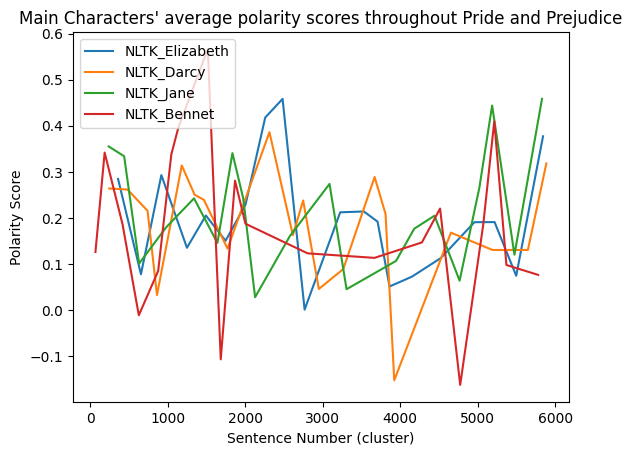

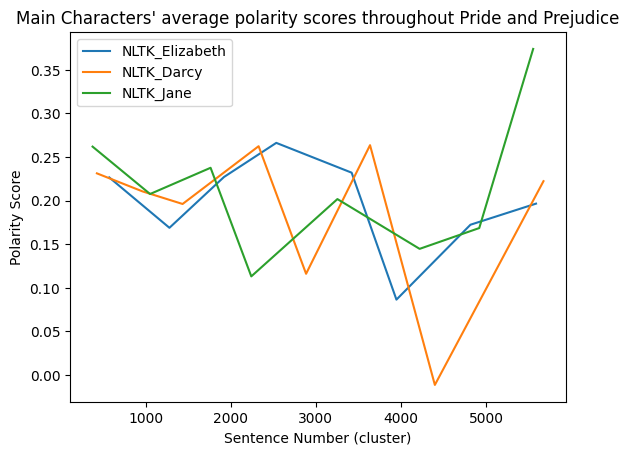

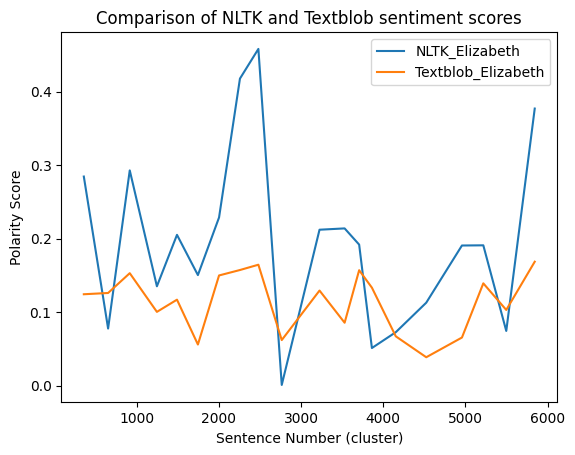

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from beautifultable import BeautifulTable
table = BeautifulTable() #table to store summary statistics

table.rows.append(["Main Characters"]+[key for key in main.keys()])
table.rows.append(["no. of mentions"]+[len(main[key]) for key in main.keys()])

table.rows.append(["NLTK mean sentiment score"]+[np.mean([b[1] for b in main[key]]) for key in main.keys()])
table.rows.append(["NLTK max sentiment score"]+[max([b[1] for b in main[key]]) for key in main.keys()])
table.rows.append(["NLTK min sentiment score"]+[min([b[1] for b in main[key]]) for key in main.keys()])
table.rows.append(["NLTK st dev of sentiment score"]+[np.std([b[1] for b in main[key]]) for key in main.keys()])

table.rows.append(["textblob mean sentiment score"]+[np.mean([c[2] for c in main[key]]) for key in main.keys()])
table.rows.append(["textblob max sentiment score"]+[max([c[2] for c in main[key]]) for key in main.keys()])
table.rows.append(["textblob min sentiment score"]+[min([c[2] for c in main[key]]) for key in main.keys()])
table.rows.append(["textblob st dev of sentiment score"]+[np.std([c[2] for c in main[key]]) for key in main.keys()])

print("Summary statistics")
print(table)

title = None
n = [20, 8, 20] #split data points into n clusters
for i in range(3):
    for key in main.keys(): #separate line for each main character
        plot_ = False
        if i == 0:          #rules to generate different plots
            plot_ = True
        if i > 0 and key != "Bennet":
            plot_ = True
        if i == 2 and key != "Elizabeth":
            plot_ = False
        #group data into n clusters to make graphs easier to read
        x = [np.mean(group) for group in np.array_split([a[0] for a in main[key]], n[i])] #first element of list, sentence cardinality, is x data
        y = [np.mean(group) for group in np.array_split([b[1] for b in main[key]], n[i])] #second element, nltk sentiment score, is y data
        y2 = [np.mean(group) for group in np.array_split([c[2] for c in main[key]], n[i])] #third element, textblob sentiment score, is alternative y data

        if i == 0:
            #subtract previous point from each point and then average the differences
            print("mean gap between points: {} = {}".format(key, np.mean([(y[i+1]-y[i])**2 for i in range(len(y)-1)])))

        if plot_:
            plt.plot(x, y, label = "NLTK_{}".format(key)) #NLTK scores
            if i == 2:
                plt.plot(x, y2, label = "Textblob_{}".format(key)) #Textblob scores

    plt.xlabel("Sentence Number (cluster)")
    plt.ylabel("Polarity Score")
    if i == 2:
        plt.title("Comparison of NLTK and Textblob sentiment scores")
    else:
        plt.title("Main Characters' average polarity scores throughout Pride and Prejudice")
    plt.legend()
    plt.show()


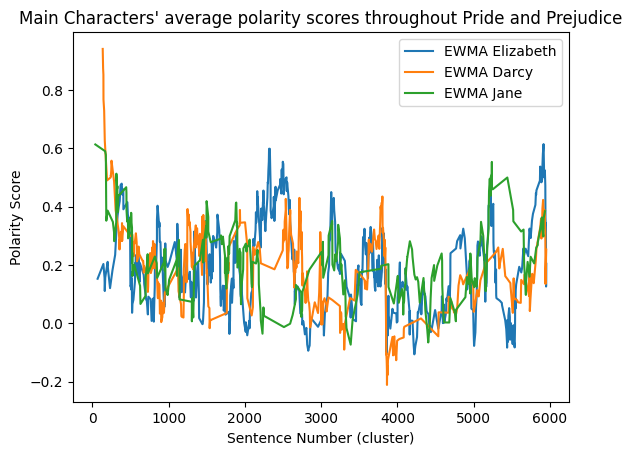

In [ ]:
def ewma(data, alpha):
  ewma = [data[0]]
  for i in range(1, len(data)):
    ewma.append(alpha*data[i] + (1-alpha)*ewma[i-1])
  return ewma

for key in list(main.keys()):
  if key != "Bennet":
    x = [a[0] for a in main[key]] #first element of list, sentence cardinality, is x data
    y = [b[1] for b in main[key]] #second element, nltk sentiment score, is y data
    #y2 = [np.mean(group) for group in np.array_split([c[2] for c in main[key]], n[i])] #third element, textblob sentiment score, is alternative y data

    #plt.plot(x, y, label = key) #NLTK scores
    plt.plot(x, ewma(y, 0.1), label = "EWMA {}".format(key))
plt.xlabel("Sentence Number (cluster)")
plt.ylabel("Polarity Score")

plt.title("Main Characters' average polarity scores throughout Pride and Prejudice")
plt.legend()
plt.show()

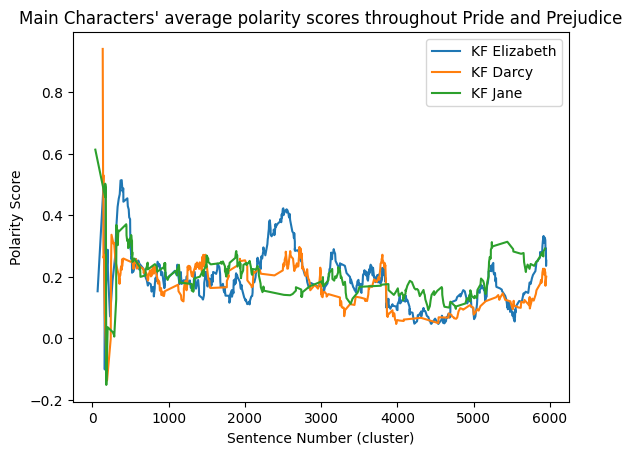

In [ ]:
def KF(data, qx, qv, r, dt, theta):
  F = np.array([[1, dt], [0, 1-theta]])
  H = np.array([[1, 0]])
  Q = np.diag([qx, qv])
  x = np.zeros((2, len(data)))
  P = np.zeros((2, 2, len(data)))
  x[:, 0] = [data[0], 0]
  P[:,:,0] = np.eye(2)

  for i in range(1, len(data)):
    x_pred=F@x[:,i-1]
    P_pred=F@P[:,:,i-1]@F.T+Q
    S=H@P_pred@H.T+r
    K=(P_pred@H.T)/S
    x[:,i]=x_pred+(K.flatten()*(data[i]-(H@x_pred)))
    P[:,:,i]=(np.eye(2)-K@H)@P_pred
  return x[0]




for key in list(main.keys()):
  if key != "Bennet":
    x = [a[0] for a in main[key]] #first element of list, sentence cardinality, is x data
    y = [b[1] for b in main[key]] #second element, nltk sentiment score, is y data
    #y2 = [np.mean(group) for group in np.array_split([c[2] for c in main[key]], n[i])] #third element, textblob sentiment score, is alternative y data

    #plt.plot(x, y, label = key) #NLTK scores
    plt.plot(x, KF(y, 0.0001, 0.0001, 1.0, 1.0, 0.4), label = "KF {}".format(key))

plt.xlabel("Sentence Number (cluster)")
plt.ylabel("Polarity Score")

plt.title("Main Characters' average polarity scores throughout Pride and Prejudice")
plt.legend()
plt.show()

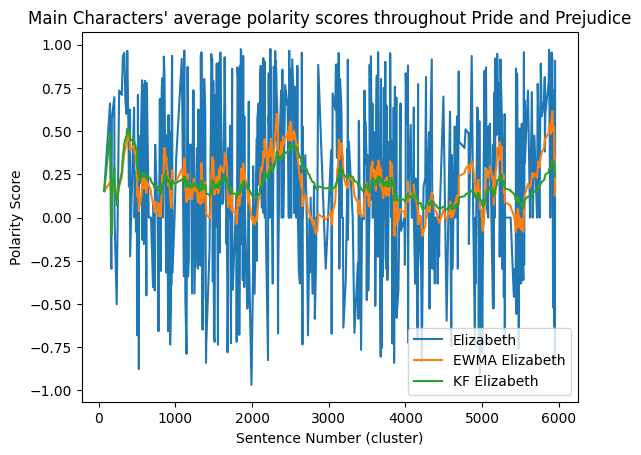

In [ ]:
for key in list(main.keys()):
  if key == "Elizabeth":
    x = [a[0] for a in main[key]] #first element of list, sentence cardinality, is x data
    y = [b[1] for b in main[key]] #second element, nltk sentiment score, is y data
    #y2 = [np.mean(group) for group in np.array_split([c[2] for c in main[key]], n[i])] #third element, textblob sentiment score, is alternative y data

    #plt.plot(x, y, label = key) #NLTK scores
    plt.plot(x, y, label = key)
    plt.plot(x, ewma(y, 0.1), label = "EWMA {}".format(key))
    plt.plot(x, KF(y, 0.0001, 0.0001, 1.0, 1.0, 0.4), label = "KF {}".format(key))
plt.xlabel("Sentence Number (cluster)")
plt.ylabel("Polarity Score")

plt.title("Main Characters' average polarity scores throughout Pride and Prejudice")
plt.legend()
plt.show()